In [17]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [134]:
df = pd.read_csv('frequency_dispersion.tsv', sep = '\t')
df

,time,"""freq"""
0,4047.5,0.300303
1,4059.5,0.300285
2,4071.5,0.300268
3,4083.5,0.300255
4,4095.5,0.300349
...,...,...
738,12903.5,0.300736
739,12915.5,0.297003
740,12927.5,0.300876
741,12939.5,0.300048


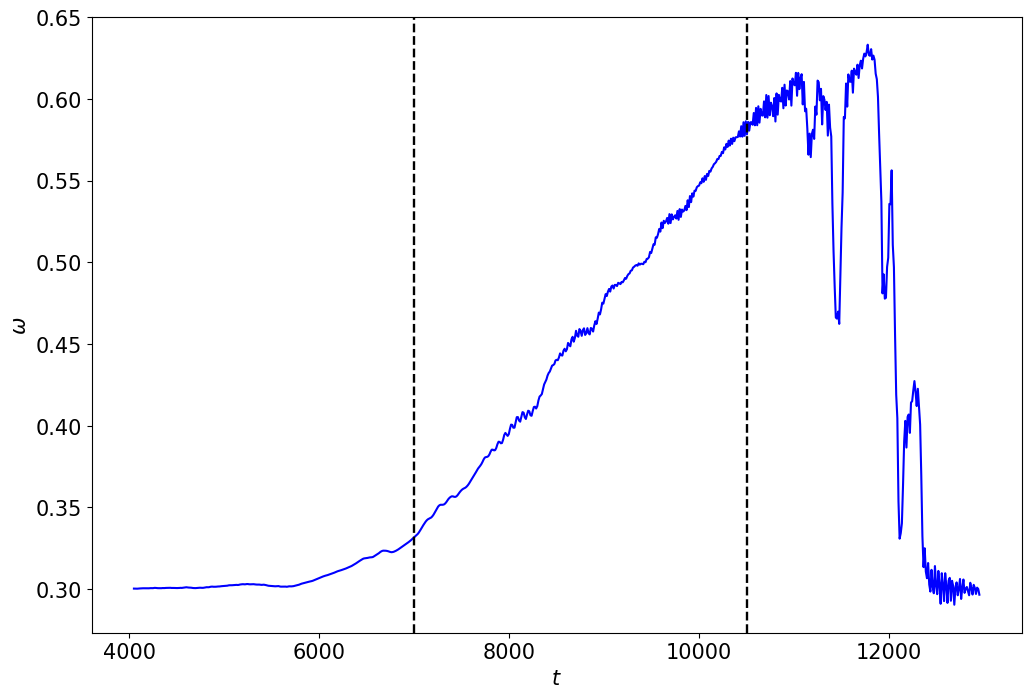

In [46]:
plt.figure(figsize = (12, 8))
plt.plot(df.iloc[:,[0]], df.iloc[:,[1]], "-b")
plt.xlabel("$t$")
plt.ylabel("$\omega$")
plt.axvline(7000, 0, 2, color = 'k', linestyle='--', linewidth=1.7)
plt.axvline(10500, 0, 2, color = 'k', linestyle='--', linewidth=1.7)

In [48]:
def least_squares(X, y):
    """Returns the least-squares solution of the equation
    
        (X^T X)β = X^T y
        
    :param X:
        A matrix of size N x M.
    :param y:
        A column vector of length N.
    """
    XT = np.transpose(X)
    return la.solve(XT @ X, XT @ y)


beta_1 = -0.18958694289430608, dw / dt = 7.36600470144523e-05



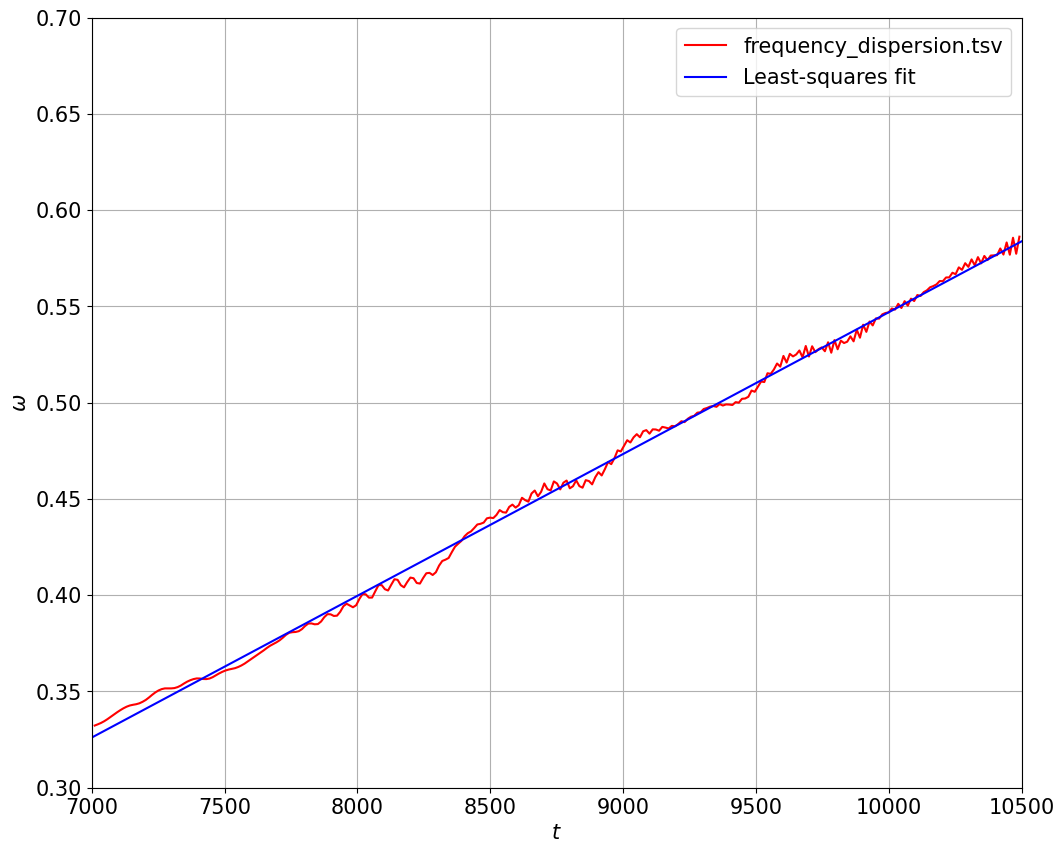

In [167]:
#import data
df = pd.read_csv('frequency_dispersion.tsv', sep = '\t')

#filter
is_min = df['time'] > 7000 
is_max = df['time'] < 10500
df = df[is_min & is_max]





#import data in xi, yi
xi = list(df['time'])
yi = list(df['        \"freq\"']) 

# define matrices, X and y
X = np.vstack([
    np.ones(len(xi)),
    xi
]).T
Y = yi

# find least-squares solution
b1, b2 = least_squares(X, Y)
print(f"""
beta_1 = {b1}, dw / dt = {b2}
""")


# draw
plt.figure(figsize=[12, 10])
ax = plt.subplot()

plt.plot(xi, yi, "-r", markeredgecolor="k",
         label="frequency_dispersion.tsv")

xs = np.linspace(7000, 10500, 100)
ys = b1 + b2*xs
plt.plot(xs, ys, "-b", label="Least-squares fit")

plt.xlim([7000, 10500])
plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")

plt.show()